# SVM 으로 분석하는 이미지 분석

In [52]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [53]:
digits = datasets.load_digits()

In [54]:
import numpy as np
a = np.array([1, 2, 3]) 
b = np.array([2,3])
tmp = [a,b] #서로 다른 개수여서 어레이가 두개가 된다
tmp

[array([1, 2, 3]), array([2, 3])]

In [55]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


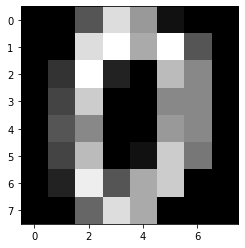

In [56]:
print(digits.images[0]) # 8*8 의 이미지 파일
plt.imshow(digits.images[0], cmap='gray')

In [57]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
digits.target[0]

0

0


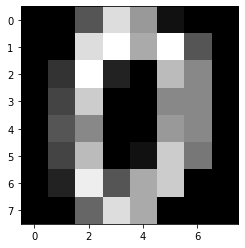

In [59]:
cnt =0
print(digits.target[cnt])
plt.imshow(digits.images[cnt], cmap='gray')

In [60]:
print(len(digits.target), len(digits.images))
np.shape(digits.target), np.shape(digits.images)
#이미지에 맞는 타겟?

1797 1797


((1797,), (1797, 8, 8))

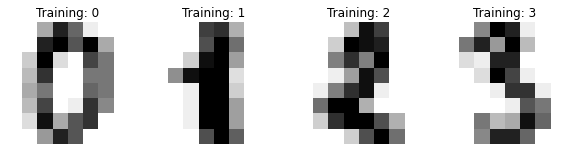

In [61]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [62]:
#모든 머신러닝은 가로 * 세로를 이해하지 못함
#가로 *세로값을 가로로 모두 변경해야한다
# 8*8 --> 65개로 변경해서 x1, x2, x3 ..... x64 의 x 변수를 제작
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
#predicted # x_test에 있는 이미지 분석결과, y값

In [64]:
X_test.shape 

(899, 64)

In [65]:
predicted[:5]

array([8, 8, 4, 9, 0])

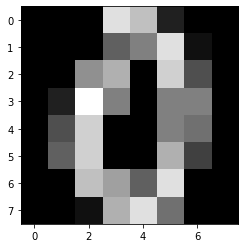

In [66]:
cnt = 4
#검증할려면 다시 reshape 해야한다
tmp = X_test[cnt].reshape(8,8)

plt.imshow(tmp, cmap='gray') 
# 이미지를 다시 표현하려고 8*8로 변경한거


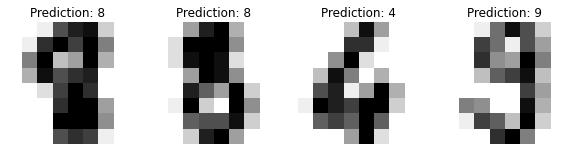

In [67]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [68]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


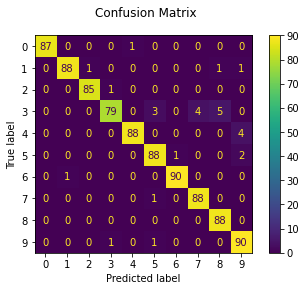

In [69]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

(8, 8)
130 0
[4]


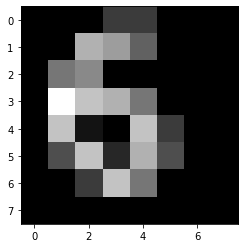

In [89]:
from PIL import Image
# 흑백변환한 이미지 직접그려서 가져와서 비교
img=Image.open('test.png')
img=img.convert('L') #흑백변환
img=img.resize((8,8)) #사이즈 맞춰야함
arr=np.array(img) #배열로 변환
print(arr.shape)
#값에 스케일이 달라서 결과 잘 안나올수 있다
# 스케일링 자료 필요
print(arr.max(), arr.min())
arr = arr//10
plt.imshow(arr,cmap='gray')
newX=arr.reshape(1,-1)

a = clf.predict(newX)
print(a)
#예측 모델을 작업한 SVm 에 입력한 사진에 사용된 값과 같은 스케일링 필요


In [71]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [90]:
arr//10

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)